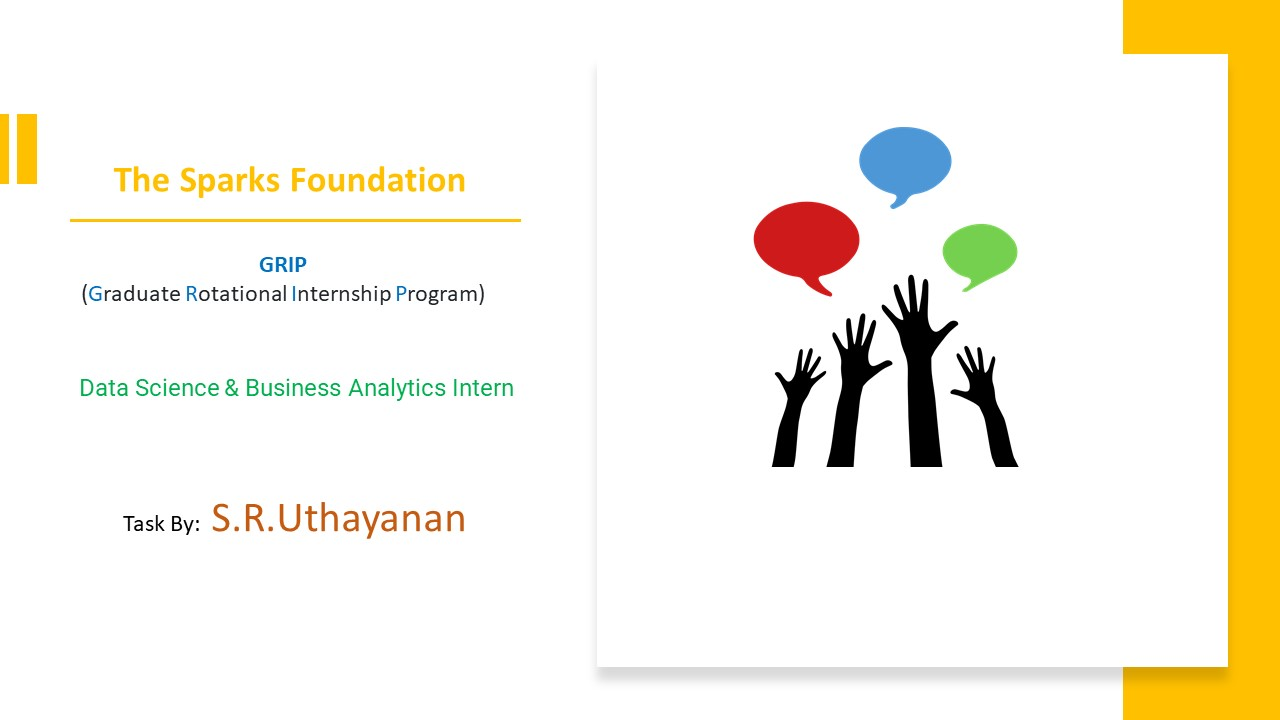

# Task-2: Prediction Using Unsupervised ML

## Problem Statement:

- From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually

## Import Libraries

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn import datasets

## Import data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sruthayanan/TSF-GRIP/main/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

- There are 150 observations and 6 variables in the dataset

In [4]:
data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [38]:
data = data.drop(['Id'],axis=1)

In [39]:
x= data.iloc[:, [0, 1, 2, 3]].values

### Finding Optimum number of clusters for K Means

In [41]:
from sklearn.cluster import KMeans

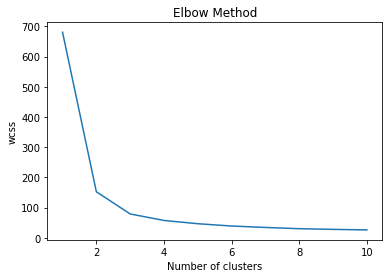

In [42]:
wcss = {}
for i in range(1,11):
    
    km=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    
    wcss[i] = km.inertia_
    
plt.plot(list(wcss.keys()), list(wcss.values()))

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

- from the above Elbow method we choose the number of Clusters as __3__.

### Compute cluster centers and predict cluster index

In [43]:
km3 = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
km3_y = km3.fit_predict(x)

## Visualising the clusters

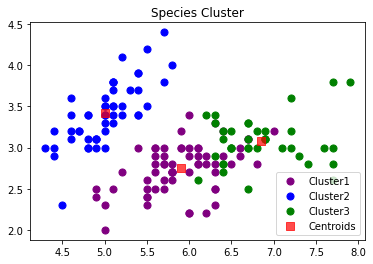

In [44]:
plt.scatter(x[km3_y==0,0],x[km3_y==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(x[km3_y==1,0],x[km3_y==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(x[km3_y==2,0],x[km3_y==2,1],s=50, c='green',label='Cluster3')

plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1],s=50,marker='s', c='red', alpha=0.7, label='Centroids')

plt.title('Species Cluster')

plt.legend()
plt.show()